In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [122]:
data = pd.read_csv('adult.csv')

In [123]:
data

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [124]:
data.shape

(32561, 15)

In [125]:
data.duplicated().sum()

24

### Rename column name 

In [126]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [127]:
data.columns = data.columns.str.replace('.','_')

In [128]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [129]:
data.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

In [130]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [131]:
data.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [132]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [133]:
data.duplicated().sum()

24

In [134]:
duplicated_values = data.duplicated().sum()/len(data) *100 

In [135]:
duplicated_values

0.07370780995669667

In [136]:
# drop duplicted values 
data.drop_duplicates(inplace=True)

In [137]:
# after droping duplicted value
data.duplicated().sum()

0

In [138]:
data.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32537.000000,3.253700e+04,32537.000000,32537.000000,32537.000000,32537.000000
mean,38.585549,1.897808e+05,10.081815,1078.443741,87.368227,40.440329
std,13.637984,1.055565e+05,2.571633,7387.957424,403.101833,12.346889
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369930e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


### Seperate numerical and categorical Columns

In [139]:
numerical_columns = data.select_dtypes(exclude="object").columns
categorical_columns = data.select_dtypes(include="object").columns

In [140]:
pd.DataFrame(categorical_columns)

,0
0,workclass
1,education
2,marital_status
3,occupation
4,relationship
5,race
6,sex
7,native_country
8,income


In [141]:
categorical_columns

Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'native_country', 'income'],
      dtype='object')

In [142]:
numerical_columns

Index(['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week'],
      dtype='object')

In [143]:
data['workclass'].value_counts()

Private             22673
Self-emp-not-inc     2540
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

<AxesSubplot:>

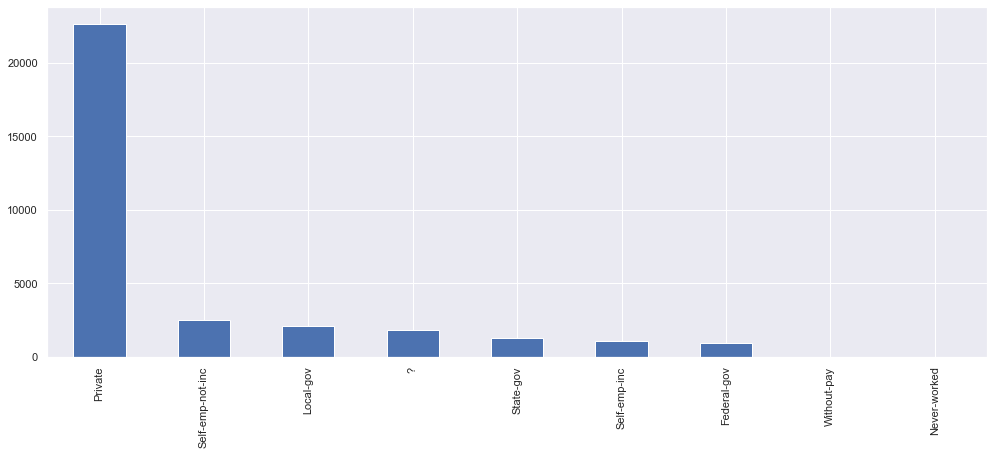

In [144]:
data['workclass'].value_counts().plot(kind="bar")

In [145]:
## Fetch unqiue values in categorical columns

for i in categorical_columns:
    print(i,data[i].unique())
    
    print()
    print("*****************************Seperated_categorical_Columns********************************")
    print()

workclass ['?' 'Private' 'State-gov' 'Federal-gov' 'Self-emp-not-inc' 'Self-emp-inc'
 'Local-gov' 'Without-pay' 'Never-worked']

*****************************Seperated_categorical_Columns********************************

education ['HS-grad' 'Some-college' '7th-8th' '10th' 'Doctorate' 'Prof-school'
 'Bachelors' 'Masters' '11th' 'Assoc-acdm' 'Assoc-voc' '1st-4th' '5th-6th'
 '12th' '9th' 'Preschool']

*****************************Seperated_categorical_Columns********************************

marital_status ['Widowed' 'Divorced' 'Separated' 'Never-married' 'Married-civ-spouse'
 'Married-spouse-absent' 'Married-AF-spouse']

*****************************Seperated_categorical_Columns********************************

occupation ['?' 'Exec-managerial' 'Machine-op-inspct' 'Prof-specialty'
 'Other-service' 'Adm-clerical' 'Craft-repair' 'Transport-moving'
 'Handlers-cleaners' 'Sales' 'Farming-fishing' 'Tech-support'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']

***************************

In [146]:
# remove ? and replace with mode value # .mode()
data["workclass"] = data["workclass"].replace(" ?"," Private")
data["occupation"] = data["occupation"].replace(" ?"," Prof-specialty")
data["native_country"] = data["native_country"].replace(" ?"," United-States")

In [147]:
data=="?"

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32557,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32558,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32559,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


### Data Visulzation for Categorical columns

In [148]:
data['workclass'].value_counts()

Private             22673
Self-emp-not-inc     2540
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

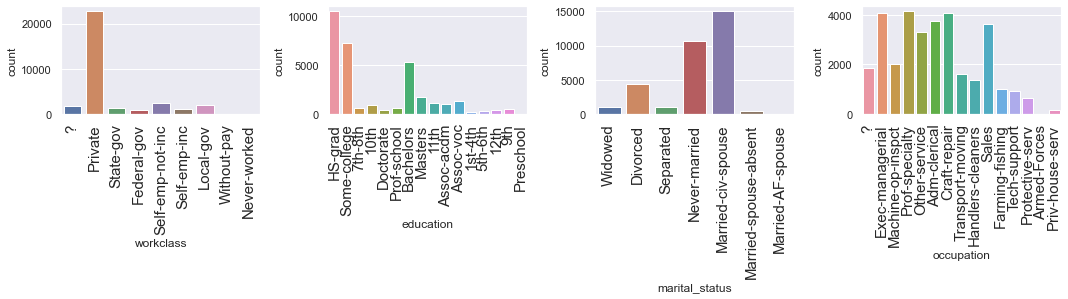

In [150]:
plot.style.use('fivethirtyeight')
sns.set(rc={"figure.figsize":(15,6)})

columns1 = ['workclass', 'education', 'marital_status', 'occupation']

for i in range(0,len(columns1)):
    plot.subplot(2,4,i+1)
    sns.countplot(x=data[columns1[i]])
    plot.xticks(size=15,rotation=90)
    plot.tight_layout()

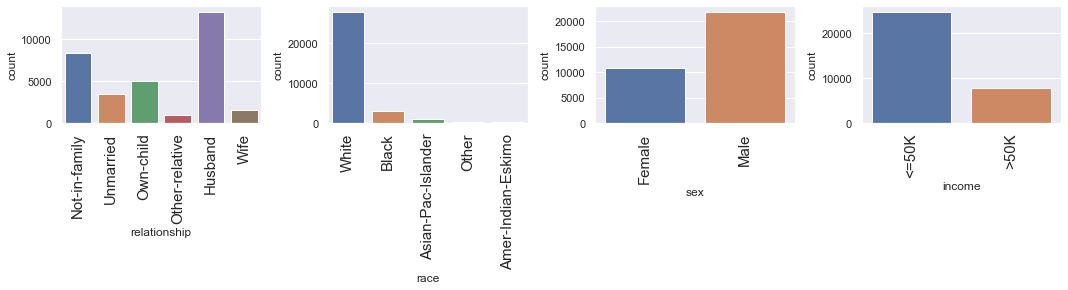

In [154]:
colmns2 = ['relationship', 'race', 'sex', 'income']

for i in range(0,len(colmns2)):
    plot.subplot(2,4,i+1)
    sns.countplot(x=data[colmns2[i]])
    plot.xticks(size=15,rotation=90)
    plot.tight_layout()


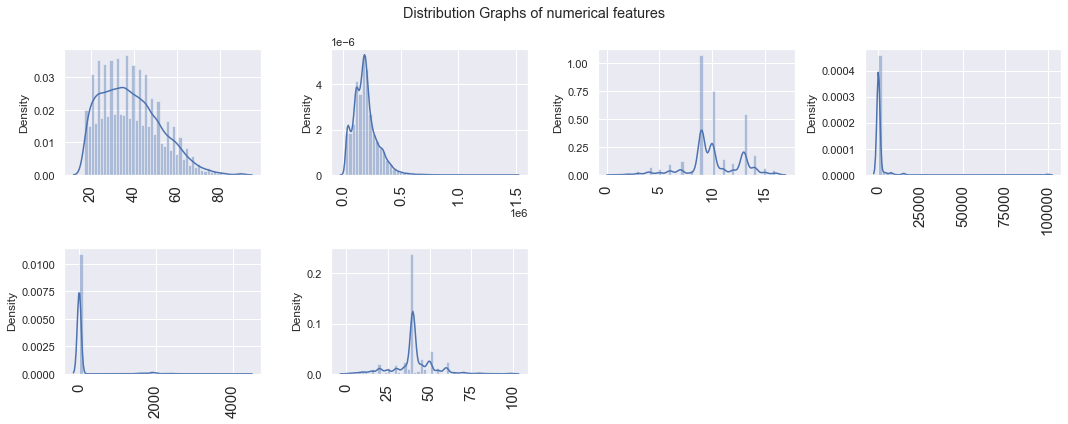

In [156]:
plot.suptitle("Distribution Graphs of numerical features")
for i in range(0,len(numerical_columns)):
    plot.subplot(2,4,i+1)
    sns.distplot(x=data[numerical_columns[i]])
    plot.xticks(size=15,rotation=90)
    plot.tight_layout()

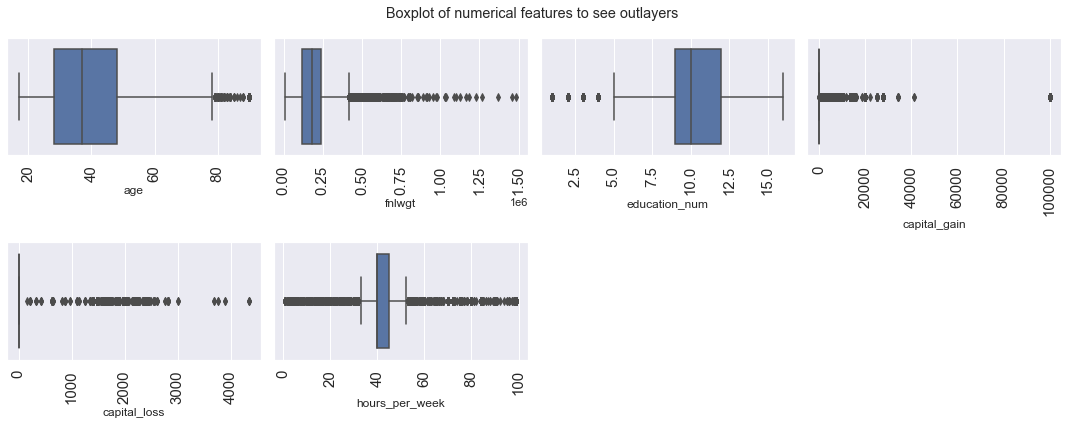

In [158]:
plot.suptitle("Boxplot of numerical features to see outlayers ")
for i in range(0,len(numerical_columns)):
    plot.subplot(2,4,i+1)
    sns.boxplot(x=data[numerical_columns[i]])
    plot.xticks(size=15,rotation=90)
    plot.tight_layout()

In [162]:
numeric_cols=['age', 'fnlwgt', 'education_num','hours_per_week']

In [166]:
def detect_outliers(data, numeric_cols):
    outliers = {}
    
    # Loop through numeric columns
    for col in numeric_cols:
        # Calculate the lower and upper quantiles
        q1 = data[col].quantile(0.25)
        q3 = data[col].quantile(0.75)
        
        # Calculate the interquartile range (IQR)
        iqr = q3 - q1
        
        # Define the lower and upper bounds for outliers
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        
        # Detect outliers
        col_outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)][col]
        
        # Save outliers for the column
        outliers[col] = col_outliers
    
    return outliers

def remove_outliers(data, outliers):
    # Loop through columns with outliers
    for col, col_outliers in outliers.items():
        # Remove outliers from the data
        data = data[~data[col].isin(col_outliers)]
    
    return data


# Detect outliers
outliers = detect_outliers(data, numeric_cols)

# Remove outliers
data_cleaned = remove_outliers(data, outliers)

# plot(data_cleaned,numeric_cols)

df=data_cleaned.copy()


In [167]:
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [168]:
data['income'].value_counts()

<=50K    24698
>50K      7839
Name: income, dtype: int64

<AxesSubplot:>

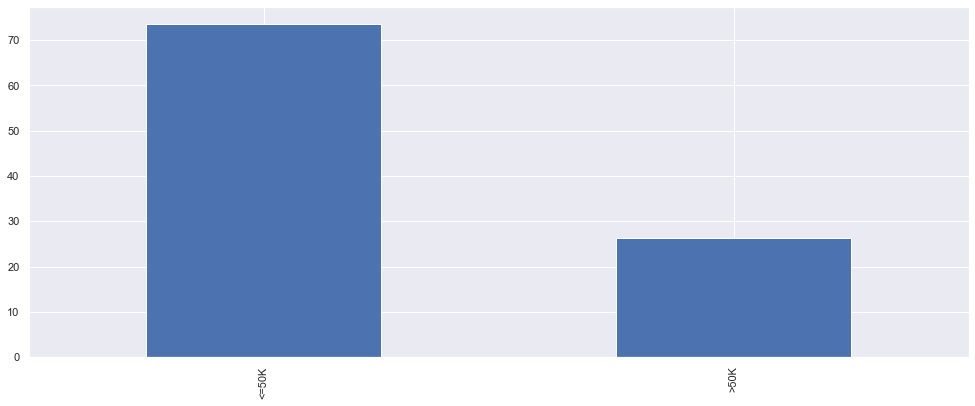

In [170]:
income_counts = df['income'].value_counts(normalize=True) * 100
income_counts.plot(kind="bar")

<AxesSubplot:xlabel='income'>

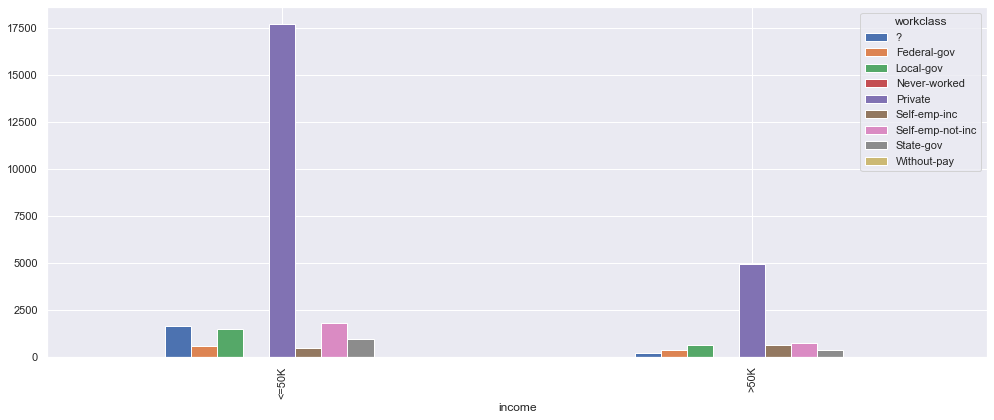

In [171]:
salary = pd.crosstab(data['income'],data['workclass'])
salary.plot(kind='bar')

<AxesSubplot:xlabel='income'>

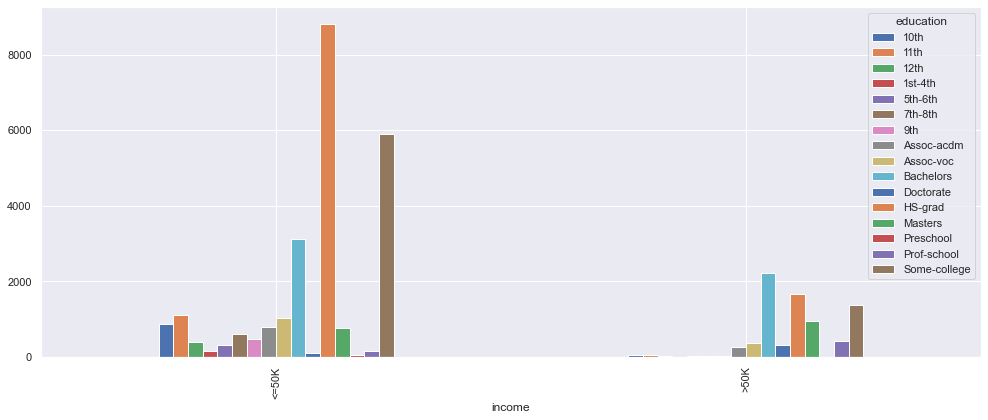

In [172]:
education = pd.crosstab(data['income'],data['education'])
education.plot(kind="bar")

<AxesSubplot:xlabel='income'>

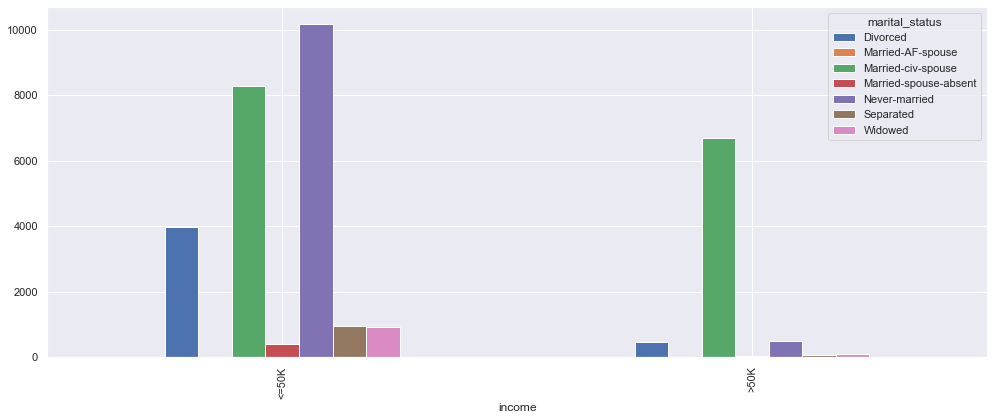

In [174]:
marital_status = pd.crosstab(data['income'],data['marital_status'])
marital_status.plot(kind="bar")

<AxesSubplot:xlabel='income'>

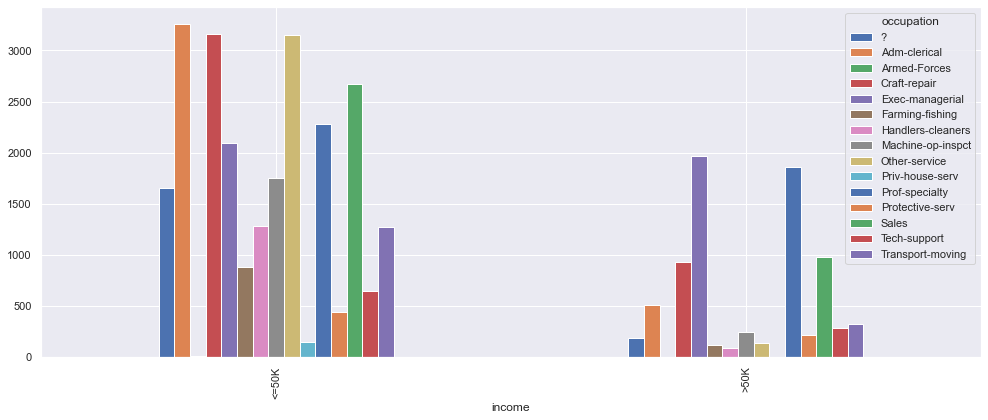

In [175]:
occupation = pd.crosstab(data['income'],data['occupation'])
occupation.plot(kind="bar")

<AxesSubplot:xlabel='income'>

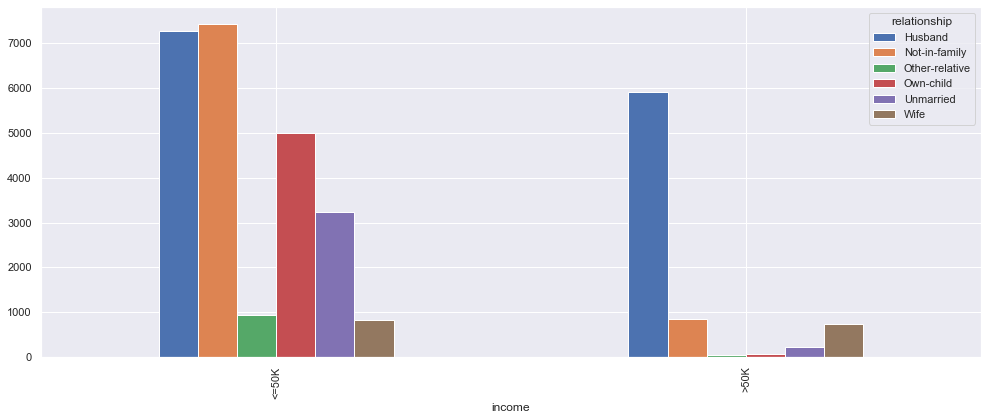

In [176]:
relationship = pd.crosstab(data['income'],data['relationship'])
relationship.plot(kind="bar")


<AxesSubplot:xlabel='income'>

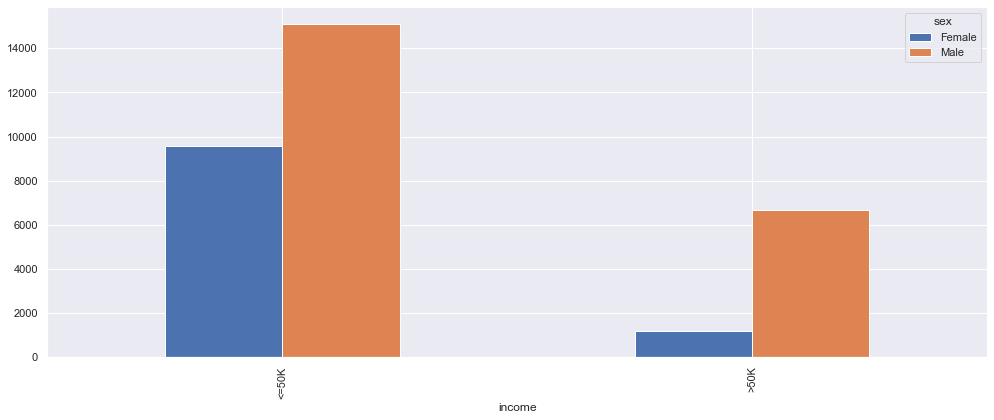

In [177]:
sex = pd.crosstab(data['income'],data['sex'])
sex.plot(kind="bar")

In [178]:
categorical_columns

Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'native_country', 'income'],
      dtype='object')

In [181]:
from sklearn.preprocessing import LabelEncoder

# create a LabelEncoder object
le = LabelEncoder()

# define the categorical features
categorical_columns =['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'native_country']

# loop through the categorical features and encode them
for feature in categorical_columns:
    le.fit(data[feature])
    data[feature] = le.transform(data[feature])

In [182]:
data["income"] = data["income"].map({'<=50K':0, '>50K':1})

<AxesSubplot:>

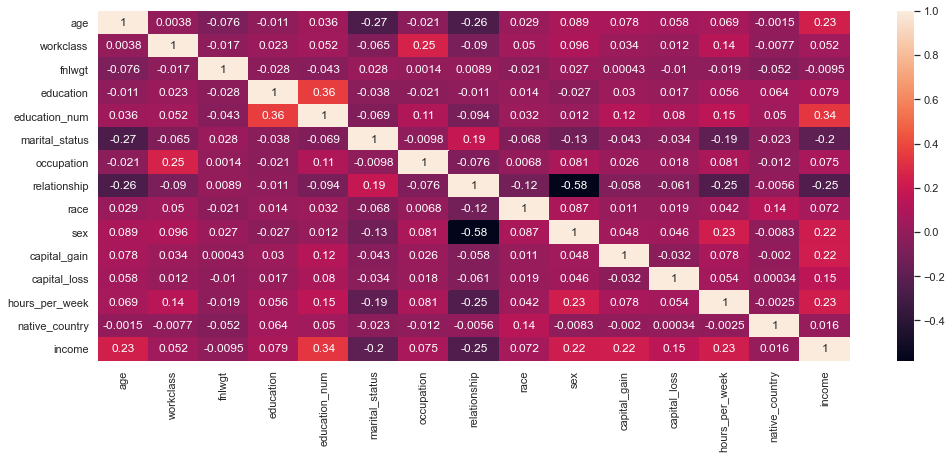

In [183]:
sns.heatmap(data.corr(),annot=True)

In [185]:
# droping education_num column because we have education ordinal encorded one
data.drop(["education","fnlwgt", "native_country"],axis=1,inplace=True)

In [186]:
data.head()

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,income
0,90,0,9,6,0,1,4,0,0,4356,40,0
1,82,4,9,6,4,1,4,0,0,4356,18,0
2,66,0,10,6,0,4,2,0,0,4356,40,0
3,54,4,4,0,7,4,4,0,0,3900,40,0
4,41,4,10,5,10,3,4,0,0,3900,40,0


In [187]:
data.to_csv("cleandata.csv",index=False)

### Model Training 

In [188]:
data.shape

(32537, 12)

In [189]:
# Seprate dependent and indipendent features
x = data.drop("income",axis=1)
y = data["income"]

In [190]:
print(x)
print(y)

       age  workclass  education_num  marital_status  occupation  \
0       90          0              9               6           0   
1       82          4              9               6           4   
2       66          0             10               6           0   
3       54          4              4               0           7   
4       41          4             10               5          10   
...    ...        ...            ...             ...         ...   
32556   22          4             10               4          11   
32557   27          4             12               2          13   
32558   40          4              9               2           7   
32559   58          4              9               6           1   
32560   22          4              9               4           1   

       relationship  race  sex  capital_gain  capital_loss  hours_per_week  
0                 1     4    0             0          4356              40  
1                 1     4    

In [191]:
catigorical_features = x.select_dtypes(include="object").columns
numerical_features = x.select_dtypes(exclude="object").columns
print(catigorical_features)
print(numerical_features)

Index([], dtype='object')
Index(['age', 'workclass', 'education_num', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'capital_gain', 'capital_loss',
       'hours_per_week'],
      dtype='object')


In [192]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
#pipline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [193]:
num_pipline = Pipeline(
    steps=[
        ("imputer",SimpleImputer(strategy="median")),
        ("scaler",StandardScaler())
    ]

) # to standardize the data values into a standard format.

cato_pipline = Pipeline(
    steps=[
        ("imputer",SimpleImputer(strategy="most_frequent")),
        ("scaler",StandardScaler())
    ]

)

# apply transform to particular columns. 
preprocessor = ColumnTransformer([
    ("num_pipline",num_pipline,numerical_features)
])

In [194]:
# Train test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)

In [195]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(26029, 11)
(6508, 11)
(26029,)
(6508,)


In [197]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
#from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score,classification_report,ConfusionMatrixDispla
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score,classification_report,ConfusionMatrixDisplay

In [198]:
def performance_metrices(test,predict):
    confusionmetrix = print(f"CONFUSION_METRIX: {confusion_matrix(test,predict)}")
    
    precision = print(f"PRECISION_SCORE: {precision_score(test,predict)}")
    
    recall = print(f"RECALL_SCORE: {recall_score(test,predict)}")
    
    f1score = print(f"F1_SCORE: {f1_score(test,predict)}")
    
    accuracyscore = print(f"ACCURACY_SCORE: {accuracy_score(test,predict)}")
    
    return confusionmetrix,precision,recall,f1score,accuracyscore
    

### Use Hyperparameter

In [199]:
lr = LogisticRegression()

In [200]:
lr

LogisticRegression()

In [201]:
pram = {
    "class_weight":["balanced"],
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
    
}

In [202]:
grid = GridSearchCV(estimator=lr,param_grid=pram,cv=5,n_jobs=-1, verbose=3)

In [203]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'class_weight': ['balanced'], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             verbose=3)

In [204]:
grid.best_params_

{'C': 0.001, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'saga'}

In [205]:
grid.score(X_train,y_train)

0.7794383187982635

In [206]:
y_prad = grid.predict(X_test)

In [207]:
accuracy_score(y_test,y_prad)


0.7811923786109404

In [208]:
dr = DecisionTreeClassifier()

In [209]:
param_grid = {
    "class_weight":["balanced"],
    "criterion":['gini',"entropy","log_loss"],
    "splitter":['best','random'],
    "max_depth":[3,4,5,6],
    "min_samples_split":[2,3,4,5],
    "min_samples_leaf":[1,2,3],
    "max_features":["auto","sqrt","log2"]
}

In [210]:
grid_search = GridSearchCV(estimator=dr,param_grid=param_grid,cv=5,scoring="accuracy")

In [211]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'class_weight': ['balanced'],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [3, 4, 5, 6],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4, 5],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [214]:
grid_search.best_params_

{'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'best'}

In [215]:
grid_search.score(X_train,y_train)

0.7417111683122671

In [216]:
y_prad = grid_search.predict(X_test)


In [217]:
accuracy_score(y_test,y_prad)

0.7297172710510141

In [218]:
print(classification_report(y_test,y_prad))

              precision    recall  f1-score   support

           0       0.95      0.68      0.79      4988
           1       0.46      0.89      0.61      1520

    accuracy                           0.73      6508
   macro avg       0.71      0.79      0.70      6508
weighted avg       0.84      0.73      0.75      6508



In [219]:
rf = RandomForestClassifier()


In [220]:
param_grid = {
    "class_weight":["balanced"],
    'n_estimators': [20, 50, 30],
    'max_depth': [10, 8, 5],
    'min_samples_split': [2, 5, 10],
}


In [221]:
grid_search = GridSearchCV(estimator=rf,param_grid=param_grid,cv=5,scoring="accuracy")

In [222]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'class_weight': ['balanced'], 'max_depth': [10, 8, 5],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [20, 50, 30]},
             scoring='accuracy')

In [223]:
grid_search.best_params_

{'class_weight': 'balanced',
 'max_depth': 10,
 'min_samples_split': 2,
 'n_estimators': 50}

In [224]:
grid_search.score(X_train,y_train)

0.8258480925121979

In [225]:
y_prad = grid_search.predict(X_test)

In [226]:
accuracy_score(y_test,y_prad)


0.8068531038721574

In [227]:
print(classification_report(y_test,y_prad))


              precision    recall  f1-score   support

           0       0.95      0.79      0.86      4988
           1       0.56      0.87      0.68      1520

    accuracy                           0.81      6508
   macro avg       0.75      0.83      0.77      6508
weighted avg       0.86      0.81      0.82      6508

